### build a supervised regression decision tree model to be able to predict TOC.

#### Key Point :- Tree-based algorithms such as decision tree, random forest, etc., do not require feature normalization or standardization.

-- Input features :- thickness, bulk density, resistivity, effective volume, effective porosity, clay volume, and water saturation.

-- Output feature :- TOC.
   
     

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [310]:
import warnings
warnings.filterwarnings('ignore')

### import data

In [311]:
df = pd.read_excel('C:/Users/sahil/OneDrive/Desktop/Elesvier/Chapter-5/Chapter 5/Decision Tree (DT)/Chapter5_TOC_Prediction_DataSet.xlsx')

In [312]:
df.head()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
0,219.713745,2.415151,3.151841,0.066973,0.228949,0.466486,0.057828
1,160.308606,2.430899,3.160330,0.034790,0.297078,0.544329,0.051316
2,149.944934,2.424665,4.087933,0.062167,0.311720,0.426713,0.055788
3,209.811890,2.394232,2.889251,0.087480,0.227958,0.479112,0.057745
4,167.492163,2.420244,2.881886,0.057664,0.302924,0.523564,0.052154


In [313]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Thickness_ft,987.0,150.448933,52.452284,50.218753,123.462354,141.662622,166.707110,475.992627
Bulk Density_gg per cc,987.0,2.423001,0.019059,2.386117,2.409469,2.422639,2.433418,2.540608
Resistivity_ohmsm,987.0,3.892432,1.342193,1.680451,3.120852,3.650354,4.319585,15.970625
Effective Porosity_Fraction,987.0,0.061492,0.014805,0.017432,0.051250,0.061158,0.072289,0.096054
Clay Volume_ Fraction,987.0,0.271257,0.045289,0.153118,0.238607,0.264785,0.303776,0.413083
Water Saturation_Fraction,987.0,0.435876,0.080023,0.230041,0.372234,0.442414,0.490972,0.683304
TOC_Fraction,987.0,0.052630,0.005062,0.030830,0.051026,0.053662,0.056100,0.060907


In [314]:
df.columns

Index(['Thickness_ft', 'Bulk Density_gg per cc', 'Resistivity_ohmsm',
       'Effective Porosity_Fraction', 'Clay Volume_ Fraction',
       'Water Saturation_Fraction', 'TOC_Fraction'],
      dtype='object')

### Visualize the Data

#### look at the Distribution Plot

<AxesSubplot:xlabel='TOC_Fraction', ylabel='Density'>

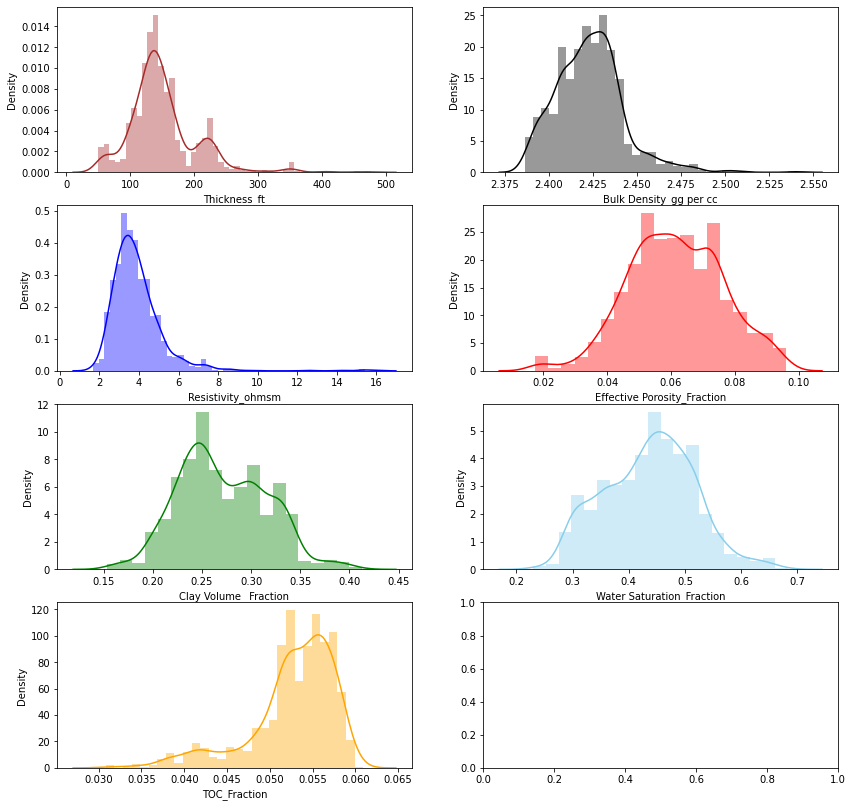

In [315]:
f, axes = plt.subplots(4,2,figsize = (14,14))

sns.distplot(df.Thickness_ft, ax = axes[0,0], color = 'brown')
sns.distplot(df['Bulk Density_gg per cc'], ax = axes[0,1], color = 'black')
sns.distplot(df['Resistivity_ohmsm'], ax = axes[1,0], color = 'blue')
sns.distplot(df['Effective Porosity_Fraction'], ax = axes[1,1], color = 'red')
sns.distplot(df['Clay Volume_ Fraction'], ax = axes[2,0], color = 'green')
sns.distplot(df['Water Saturation_Fraction'], ax = axes[2,1], color = 'skyblue')
sns.distplot(df['TOC_Fraction'], ax = axes[3,0], color = 'orange')


### Box Plot

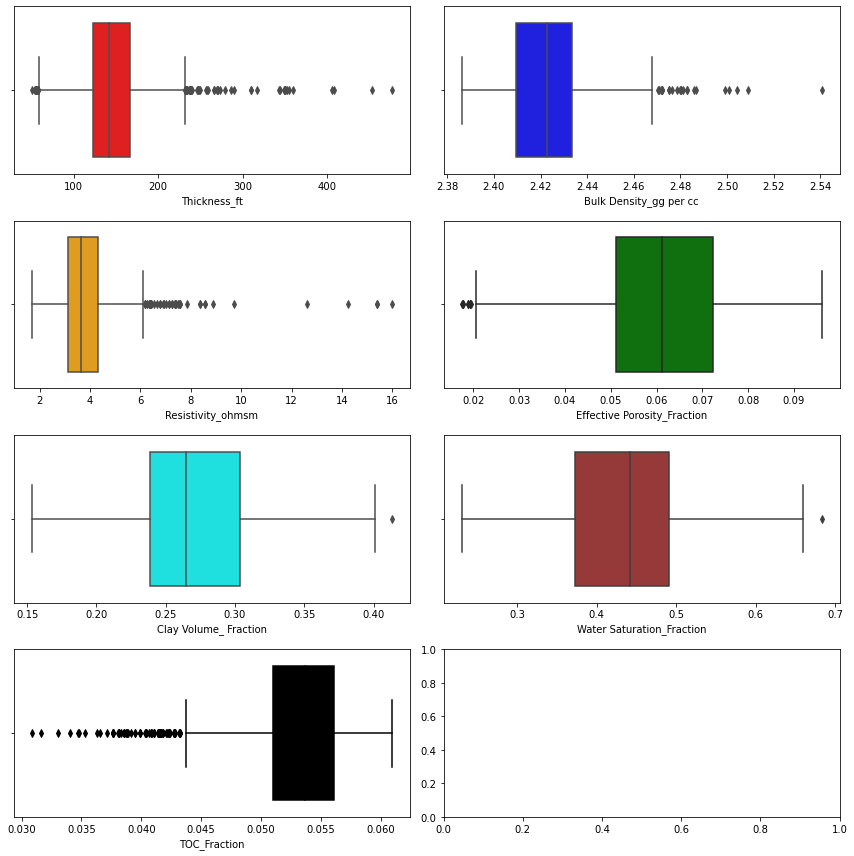

In [316]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(df['Thickness_ft'] , color="red", ax=axes[0, 0])
sns.boxplot(df['Bulk Density_gg per cc'] , color="blue", ax=axes[0, 1])
sns.boxplot(df['Resistivity_ohmsm'] , color="orange", ax=axes[1, 0])
sns.boxplot(df['Effective Porosity_Fraction'] , color="green", ax=axes[1, 1])
sns.boxplot(df['Clay Volume_ Fraction'] , color="cyan", ax=axes[2, 0])
sns.boxplot(df['Water Saturation_Fraction'] , color="brown", ax=axes[2, 1])
sns.boxplot(df['TOC_Fraction'] , color="black", ax=axes[3, 0])


plt.tight_layout()

### Scatter Plot

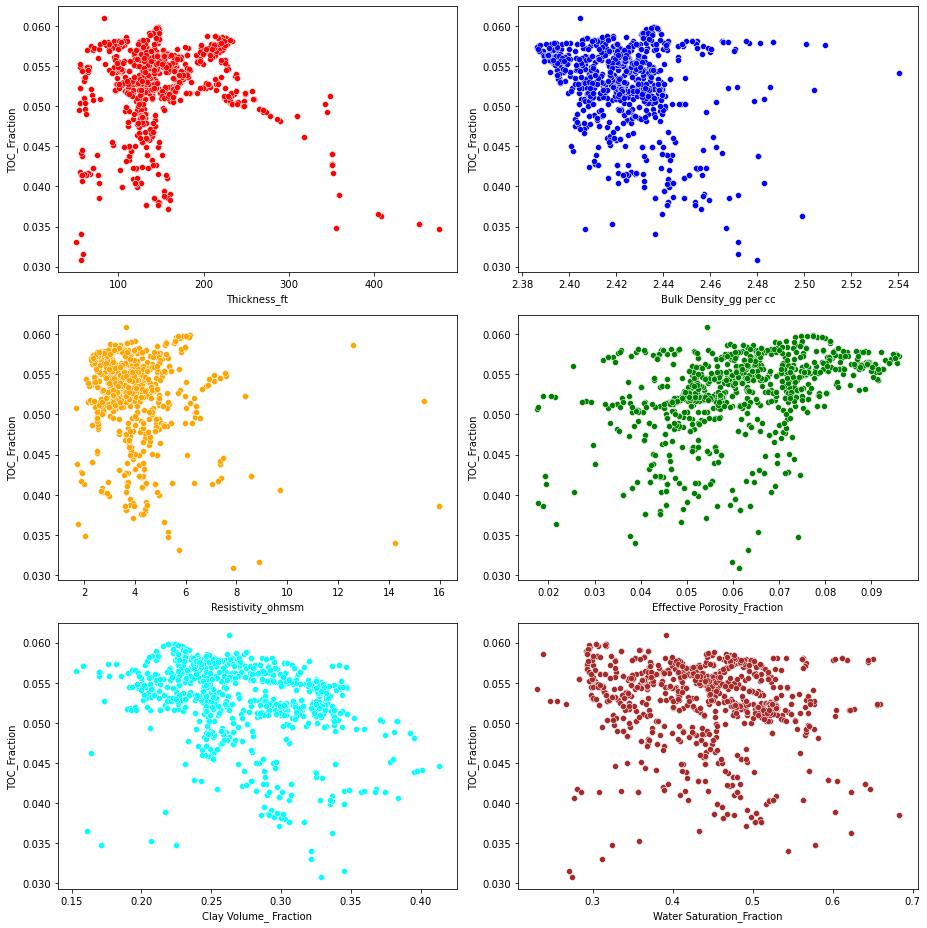

In [317]:
f, axes = plt.subplots(3, 2, figsize=(13, 13))
sns.scatterplot(df['Thickness_ft'] ,df['TOC_Fraction'], color="red", ax=axes[0, 0])
sns.scatterplot(df['Bulk Density_gg per cc'] ,df['TOC_Fraction'], color="blue", ax=axes[0, 1])
sns.scatterplot(df['Resistivity_ohmsm'],df['TOC_Fraction'] , color="orange", ax=axes[1, 0])
sns.scatterplot(df['Effective Porosity_Fraction'] ,df['TOC_Fraction'], color="green", ax=axes[1, 1])
sns.scatterplot(df['Clay Volume_ Fraction'] ,df['TOC_Fraction'], color="cyan", ax=axes[2, 0])
sns.scatterplot(df['Water Saturation_Fraction'] ,df['TOC_Fraction'], color="brown", ax=axes[2, 1])

plt.tight_layout()

### Pair Plot

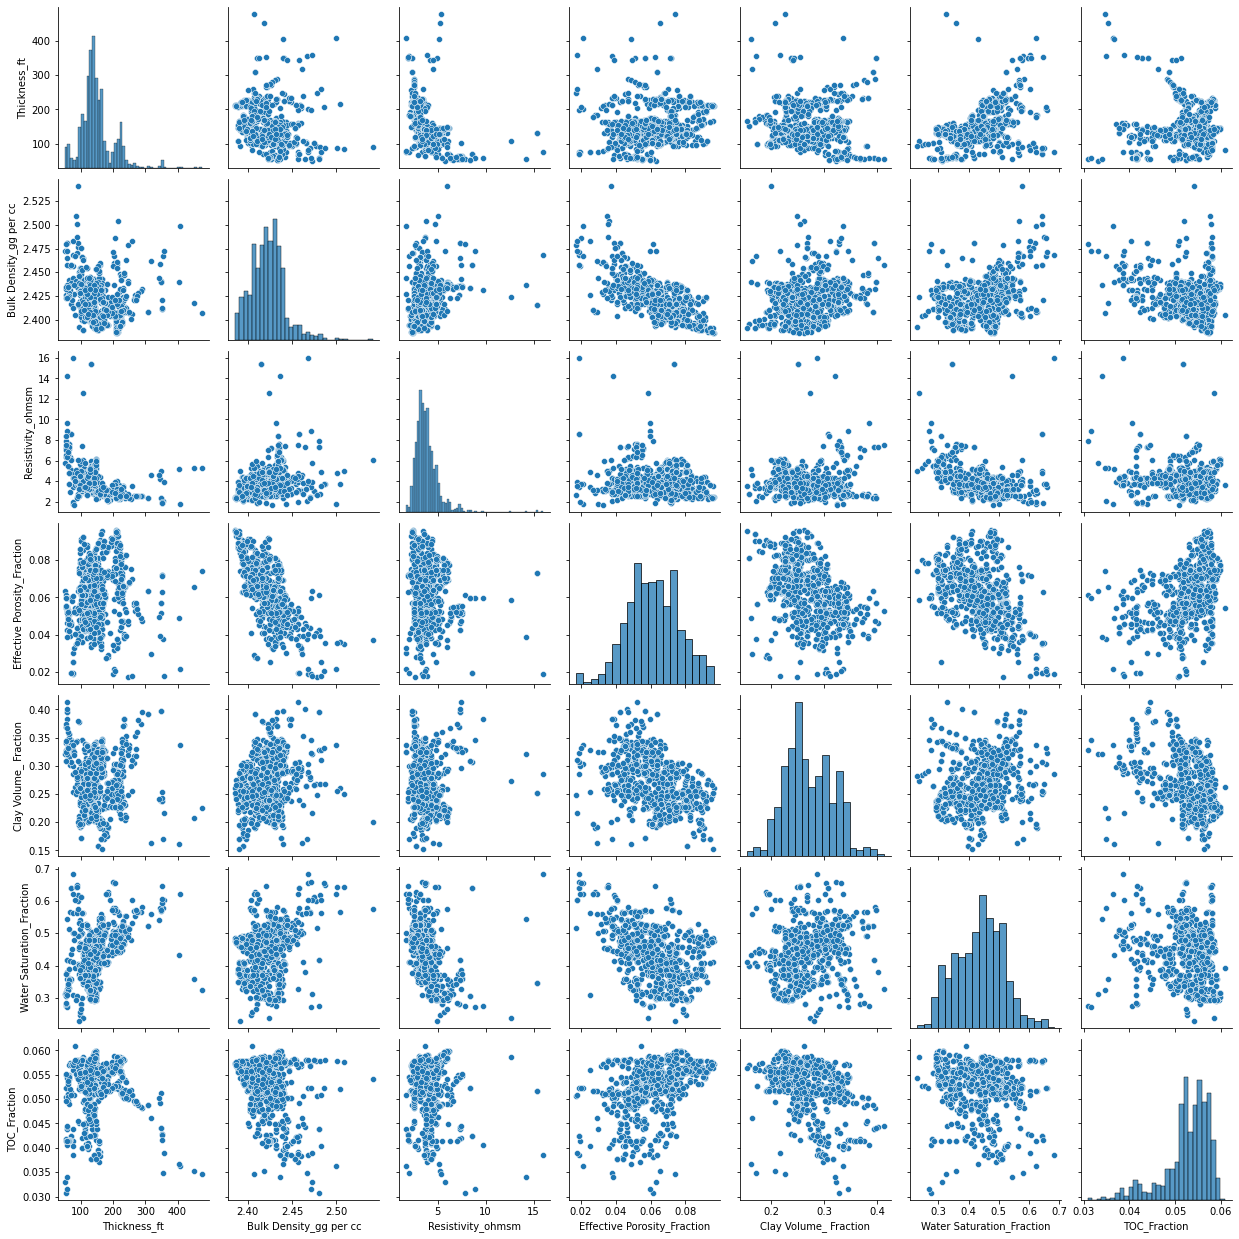

In [318]:
sns.pairplot(df)


### heat map

<AxesSubplot:>

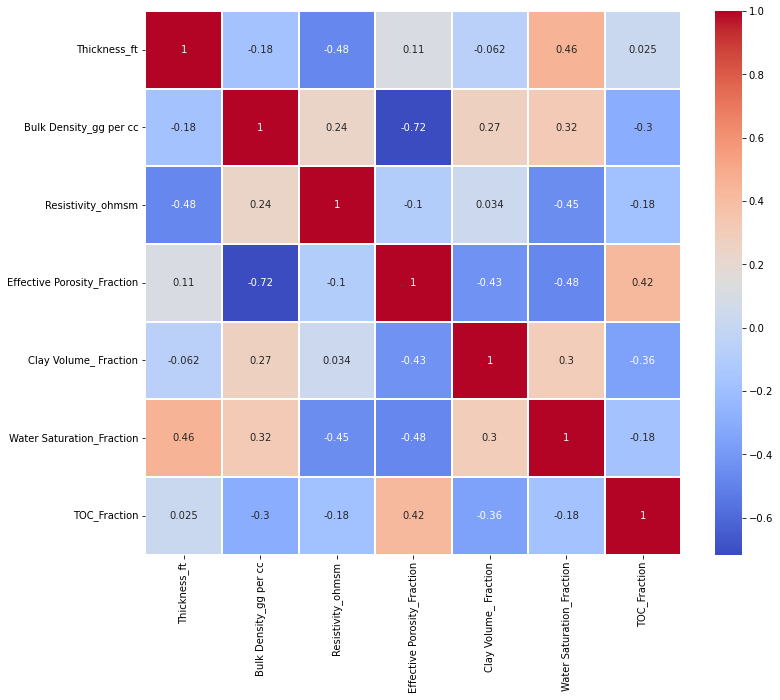

In [319]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=2, cmap= 'coolwarm')

### Split the Data into Training and Testing sets

In [320]:
from sklearn.model_selection import train_test_split

In [321]:
X = df.drop('TOC_Fraction',axis=1)

In [322]:
y = df.TOC_Fraction

In [323]:
X_train,X_test,y_train, y_test= train_test_split(X, y, test_size=0.30, random_state = 42)

### import the DecisionTreeRegressor from sklearn.tree

In [363]:
from sklearn.tree import DecisionTreeRegressor

In [383]:
np.random.seed(100)
dtree = DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=None, min_samples_split=4, min_samples_leaf=1,
                              max_features=None,ccp_alpha=0)

In [384]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0, criterion='mae', min_samples_split=4)

In [385]:
y_pred_train=dtree.predict(X_train)


In [386]:
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]

print('R =',corr_train)

print('R^2 =',corr_train**2)

R = 0.9954985666370062
R^2 = 0.9910173961763339


In [387]:
y_pred_test=dtree.predict(X_test)

In [388]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1]

print('R =',corr_test)

print('R^2 =',corr_test**2)

R = 0.8452983300157381
R^2 = 0.7145292667273956


In [389]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),5))

MAE: 0.00112
MSE: 1e-05
RMSE: 0.00282


### visualize the training actual vs prediction and testing actual vs prediction

Text(0.5, 1.0, 'TOC Training Actual Vs. Prediction')

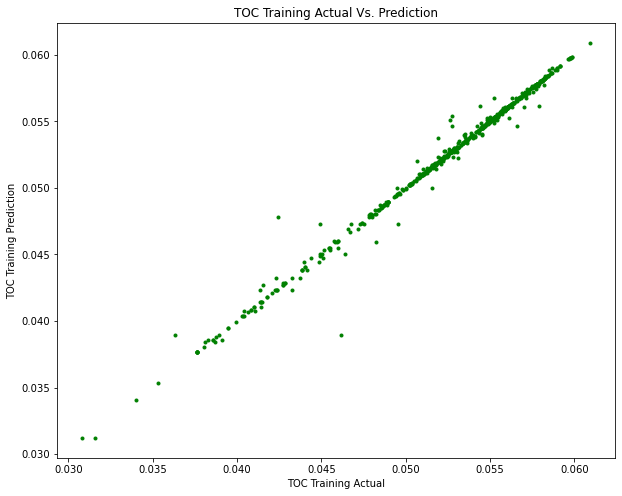

In [390]:
plt.figure(figsize=(10,8))
plt.scatter(y_train, y_pred_train, c = 'green', marker = '.')
plt.xlabel('TOC Training Actual')
plt.ylabel('TOC Training Prediction')
plt.title('TOC Training Actual Vs. Prediction')

Text(0.5, 1.0, 'TOC Testing Actual Vs. Prediction')

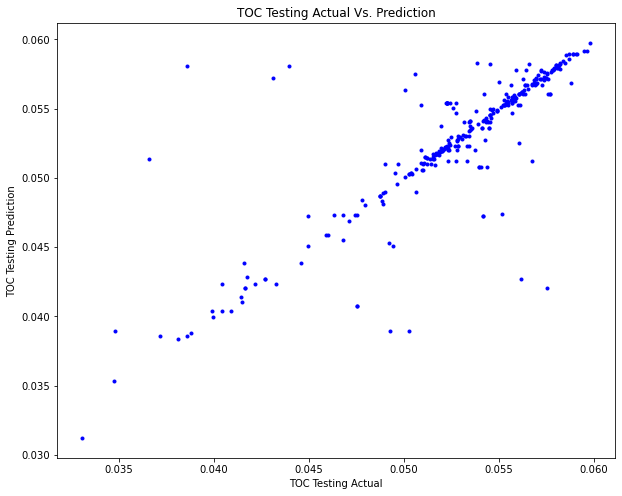

In [391]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred_test,  c = 'blue', marker = '.')
plt.xlabel('TOC Testing Actual')
plt.ylabel('TOC Testing Prediction')
plt.title('TOC Testing Actual Vs. Prediction')

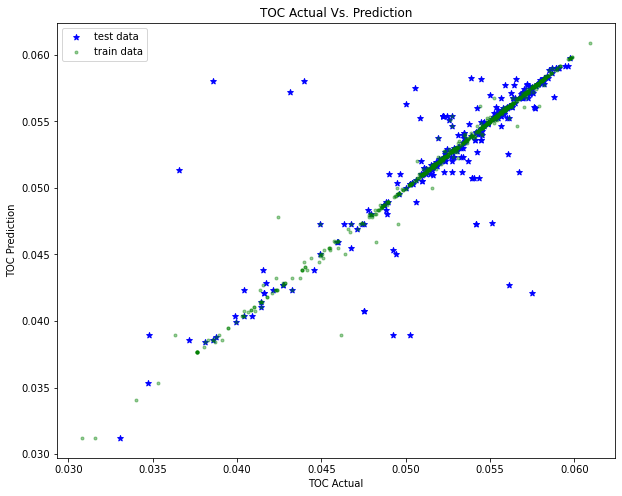

In [392]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred_test,  c = 'blue', marker = '*', label = 'test data')
plt.scatter(y_train, y_pred_train, c = 'g', marker = '.', alpha = 0.4, label = 'train data')
plt.xlabel('TOC Actual')
plt.ylabel('TOC Prediction')
plt.title('TOC Actual Vs. Prediction')
plt.legend()

In [393]:
TOC_Actual_Prediction=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})
TOC_Actual_Prediction.reset_index()


,index,Actual,Predicted
0,309,0.054117,0.053594
1,139,0.058363,0.058435
2,499,0.057997,0.058120
3,854,0.051938,0.053736
4,88,0.051221,0.051025
...,...,...,...
292,911,0.041707,0.042845
293,468,0.051501,0.051707
294,731,0.056851,0.057070
295,823,0.048823,0.048302


In [394]:
dtree.feature_importances_

array([0.23141669, 0.17523419, 0.08359116, 0.22617822, 0.17654897,
       0.10703078])

Text(0.5, 1.0, 'Feature Importance Ranking')

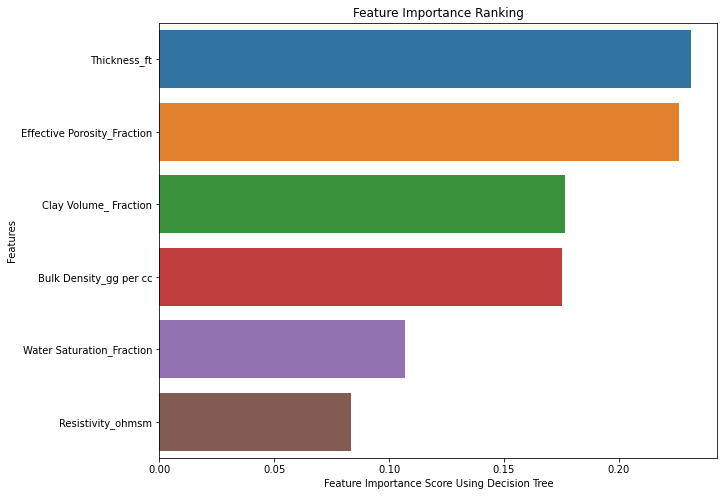

In [395]:
feature_names = df.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp = pd.Series(dtree.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Decision Tree')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")


#### As we can see thickness and effective porosity are two of the most important features impacting the output of the model

In [396]:
from sklearn.model_selection import cross_val_score

scores_R2 = cross_val_score(dtree, X, y,cv=5,scoring='r2')
print(" R2_Cross-validation scores: {}". format( scores_R2))
print(" Average R2_Cross-validation scores: {}". format( scores_R2.mean()))

 R2_Cross-validation scores: [0.52191528 0.36855562 0.44405228 0.71768094 0.60594752]
 Average R2_Cross-validation scores: 0.5316303269839422
